In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

##### Points to Present - 
Ensemble Method; 
Found a paper;
Preprocessing done including FS, FE, CI; 
Scripts are ready; 
Result of adding demographic features to the dataset;

In [43]:
labels = pd.read_csv('../../modelling/Patient class labels.csv')
labels

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1
...,...,...,...,...,...
917,Breast_MRI_918,1,1,0,0
918,Breast_MRI_919,1,1,0,0
919,Breast_MRI_920,1,1,0,0
920,Breast_MRI_921,1,1,0,0


In [44]:
features = pd.read_csv('../../modelling/pyradiomics_extraction.csv')
# other_features = pd.read_csv('../../modelling/Preprocessed_Clinical_Features.csv')
features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,sequence
0,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,2.825564,0.003846,4.996251e+06,1060.390698,0.000323,0.220287,0.032468,0.000324,Breast_MRI_001,pre
1,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,2.580368,0.004380,4.745944e+06,714.483384,0.000444,0.160234,0.019571,0.000443,Breast_MRI_001,post_1
2,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,3.147323,0.002108,5.759789e+06,302.684948,0.000982,0.130170,0.012262,0.000985,Breast_MRI_002,pre
3,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,3.339987,0.003194,4.028316e+06,253.258853,0.001130,0.113070,0.008739,0.001129,Breast_MRI_002,post_1
4,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,19467.935987,44.986213,...,2.909565,0.005536,6.875739e+06,356.064866,0.000750,0.063894,0.002623,0.000748,Breast_MRI_003,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0.877183,0.856791,15.749673,18.382163,19.038279,20.649190,20.505122,24.348411,3033.167788,16.124515,...,1.811278,0.001512,3.036683e+06,4.777973,0.052622,0.007182,0.000027,0.053438,Breast_MRI_920,post_1
1840,0.913000,0.800835,33.226543,41.489900,43.076382,45.448460,48.143552,55.603011,33924.801358,37.880295,...,3.258646,0.001186,3.581583e+07,258.667361,0.001018,0.042386,0.001378,0.001013,Breast_MRI_921,pre
1841,0.913000,0.800835,33.226543,41.489900,43.076382,45.448460,48.143552,55.603011,33924.801358,37.880295,...,3.144687,0.001208,3.514451e+07,259.701406,0.001015,0.042512,0.001414,0.001006,Breast_MRI_921,post_1
1842,0.945533,0.798995,9.708553,12.150957,14.031840,12.641847,13.078416,16.022136,881.013461,11.489125,...,1.921928,0.002778,5.076704e+05,3.463405,0.073097,0.015201,0.000122,0.075003,Breast_MRI_922,pre


In [45]:
features['sequence']

0          pre
1       post_1
2          pre
3       post_1
4          pre
         ...  
1839    post_1
1840       pre
1841    post_1
1842       pre
1843    post_1
Name: sequence, Length: 1844, dtype: object

In [46]:
post_features = features[features['sequence'] == 'post_1']
total_features = pd.merge(post_features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')
total_features.drop(columns = ['sequence', 'patient'], inplace = True)

# Merging total_features and df
# total = pd.concat([total_features, other_features], axis = 1)
# total

In [47]:
total_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,4.745944e+06,714.483384,0.000444,0.160234,0.019571,0.000443,0,0,1,2
1,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,4.028316e+06,253.258853,0.001130,0.113070,0.008739,0.001129,0,0,0,3
2,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,19467.935987,44.986213,...,8.253185e+06,334.122497,0.000797,0.060139,0.002368,0.000793,1,1,0,0
3,0.707826,0.609522,8.893590,14.591090,11.420813,14.972284,14.477716,16.540987,871.867992,10.327956,...,5.031070e+05,1.433279,0.175459,0.006397,0.000027,0.162040,1,1,0,0
4,0.679296,0.424353,22.534695,53.103672,55.175581,49.674566,36.443449,58.274413,28042.704264,36.073114,...,5.665065e+07,26.382136,0.009536,0.004559,0.000020,0.009259,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.877153,0.648783,29.186299,44.986213,45.886501,41.977361,51.383808,56.811793,33662.244229,39.459771,...,7.408352e+07,185.710080,0.001439,0.021210,0.000886,0.001411,1,1,0,0
918,0.964239,0.648439,13.914028,21.457727,21.631462,21.084250,25.375225,27.677709,4018.670942,20.690383,...,1.851005e+06,47.436404,0.005525,0.043527,0.001345,0.005336,1,1,0,0
919,0.877183,0.856791,15.749673,18.382163,19.038279,20.649190,20.505122,24.348411,3033.167788,16.124515,...,3.036683e+06,4.777973,0.052622,0.007182,0.000027,0.053438,1,1,0,0
920,0.913000,0.800835,33.226543,41.489900,43.076382,45.448460,48.143552,55.603011,33924.801358,37.880295,...,3.514451e+07,259.701406,0.001015,0.042512,0.001414,0.001006,1,1,0,0


##### Label Encoding

In [48]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# object_cols = list(total_features.columns)
# object_cols = [col for col in object_cols if total_features[col].dtype == 'object']
# print("Categorical variables:")
# print(total_features['ER'].dtype)

## Data Processing, Visualisation and Feature Selection

In [49]:
# Checking for null values
total_features.isna().sum(axis=0)

original_shape_Elongation                 0
original_shape_Flatness                   0
original_shape_LeastAxisLength            0
original_shape_MajorAxisLength            0
original_shape_Maximum2DDiameterColumn    0
                                         ..
original_ngtdm_Strength                   0
ER                                        0
PR                                        0
HER2                                      0
Mol Subtype                               0
Length: 111, dtype: int64

#### Box plot for checking outliers and Feature Scaling

In [51]:
# Applying feature scaling to the data
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler, PowerTransformer, QuantileTransformer
# scaling using robust scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(total_features.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']))
scaled_features = pd.DataFrame(scaled_features, columns = total_features.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']).columns)
scaled_features[['ER', 'PR', 'HER2', 'Mol Subtype']] = total_features[['ER', 'PR', 'HER2', 'Mol Subtype']]
scaled_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,0.505131,1.115419,0.108828,-0.294570,-0.120164,-0.169306,-0.211116,-0.180695,-0.257187,-0.156554,...,-0.360919,-0.162420,-0.137057,1.569740,1.403935,-0.244770,0,0,1,2
1,-1.089321,-0.009865,-0.439316,-0.481347,-0.619246,-0.463561,-0.537297,-0.545883,-0.326325,-0.665865,...,-0.367710,-0.274404,-0.137057,0.846697,0.343776,-0.239267,0,0,0,3
2,0.809978,-2.063513,-0.713129,0.198601,0.050290,-0.008271,0.379013,0.154282,-0.259573,0.500331,...,-0.327732,-0.254770,-0.137057,0.035243,-0.279822,-0.241962,1,1,0,0
3,-0.811453,-0.243374,-0.975814,-0.998323,-1.072099,-0.973940,-1.058281,-1.051448,-0.358866,-1.082864,...,-0.401068,-0.335546,-0.137056,-0.788648,-0.508932,1.051176,1,1,0,0
4,-1.015616,-1.287753,-0.246699,0.375523,0.617424,0.216342,-0.308890,0.172127,-0.213789,0.093179,...,0.130236,-0.329489,-0.137057,-0.816816,-0.509654,-0.174069,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.400255,-0.021936,0.108828,0.085951,0.258740,-0.047671,0.200821,0.129245,-0.183783,0.247882,...,0.295197,-0.290804,-0.137057,-0.561559,-0.424871,-0.237005,1,1,0,0
918,1.023452,-0.023877,-0.707473,-0.753372,-0.677831,-0.764301,-0.686497,-0.724932,-0.342064,-0.609507,...,-0.388313,-0.324377,-0.137057,-0.219429,-0.379972,-0.205526,1,1,0,0
919,0.400471,1.151257,-0.609358,-0.863086,-0.777962,-0.779223,-0.852647,-0.822544,-0.347326,-0.818076,...,-0.377094,-0.334734,-0.137057,-0.776607,-0.508978,0.180231,1,1,0,0
920,0.656784,0.835654,0.324779,-0.038771,0.150232,0.071387,0.090275,0.093805,-0.182381,0.175732,...,-0.073269,-0.272839,-0.137057,-0.234977,-0.373205,-0.240254,1,1,0,0


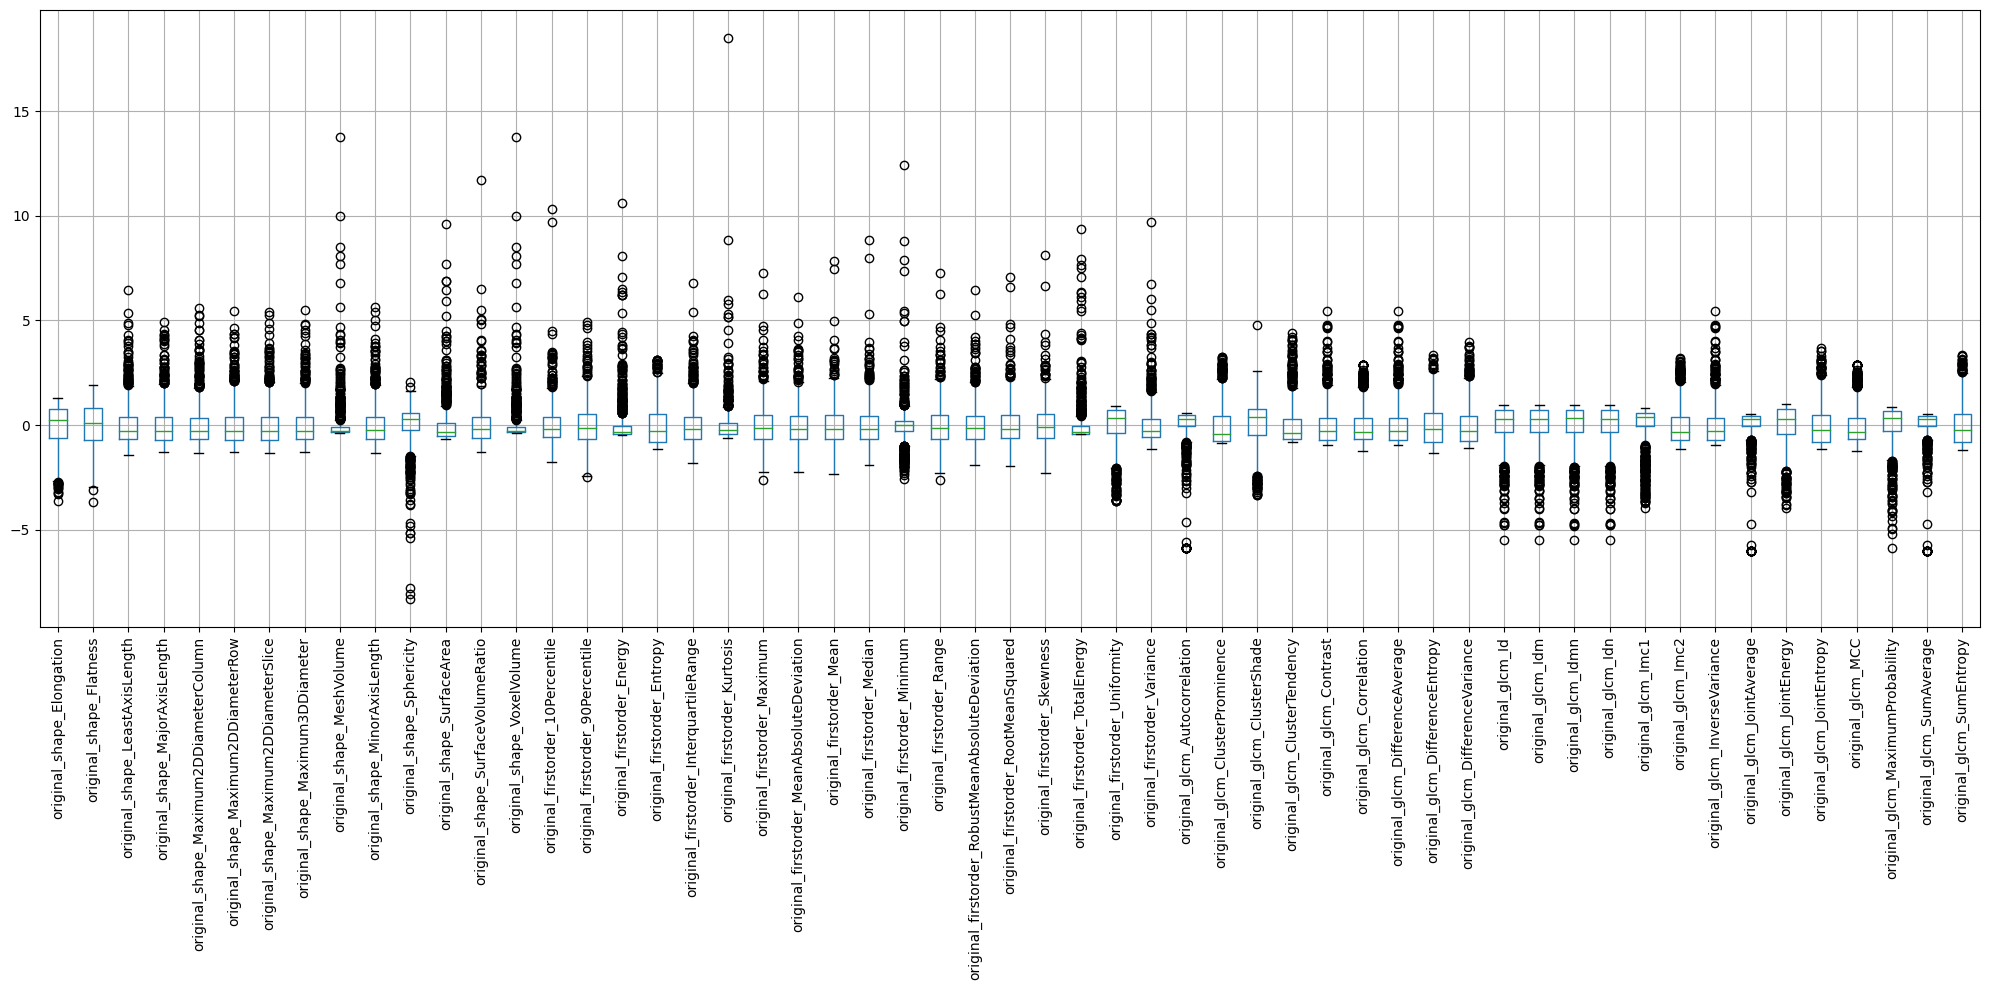

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# get first 55 features
box1 = scaled_features.iloc[:, 0:55]
box1.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

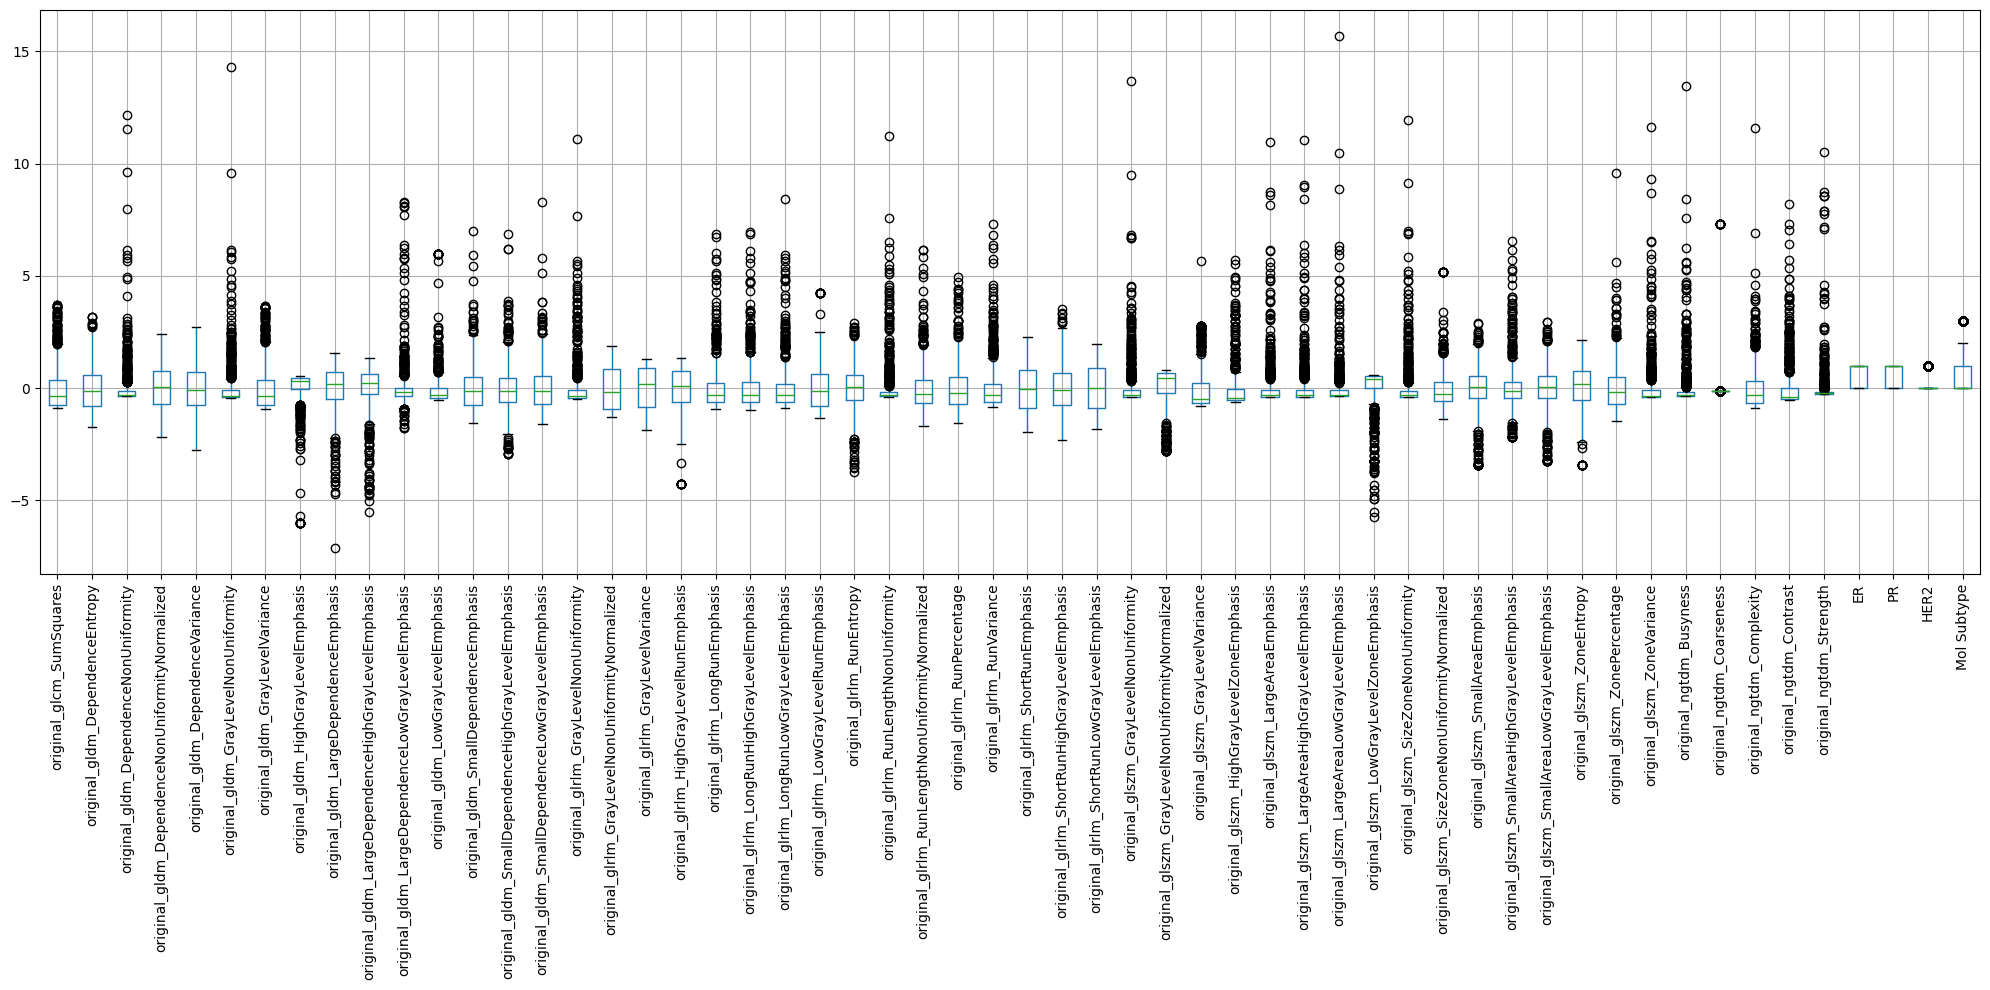

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# get the remaining features
box2 = scaled_features.iloc[:, 55:]
box2.boxplot(ax=ax, rot=90, showfliers=True)
plt.tight_layout()
plt.show()

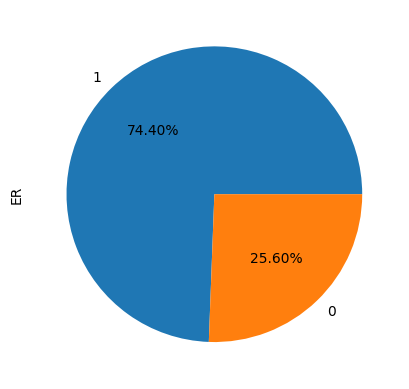

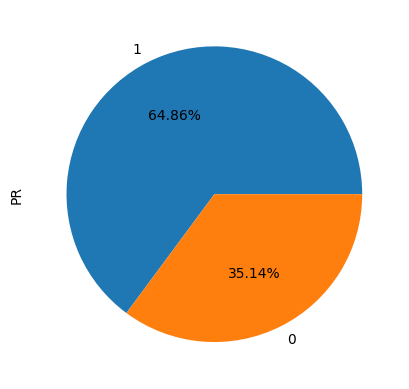

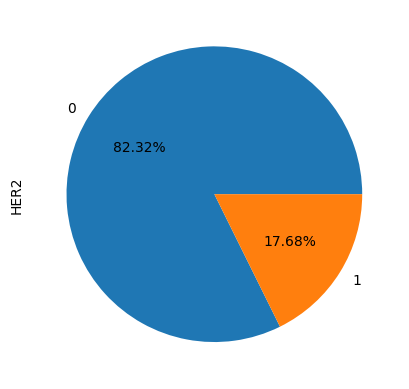

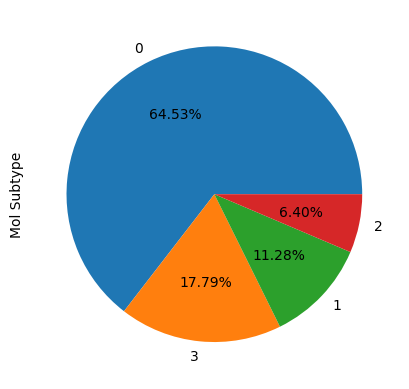

In [ ]:
scaled_features['ER'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
scaled_features['PR'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
scaled_features['HER2'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
scaled_features['Mol Subtype'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

##### We can see clearly that there is a class imbalance problem that occurs over here since majority of the data comes from class 0

In [66]:
# Resampling the dataset using SMOTE
from imblearn.over_sampling import SMOTE

def over_sample(preprocessed_df):
  smote = SMOTE()

  x = preprocessed_df.iloc[:, :-1]
  y = preprocessed_df.iloc[:, -1]

  x, y = smote.fit_resample(x, y)
  return x,y

er_df = scaled_features.drop(columns = ['PR', 'HER2', 'Mol Subtype'])
pr_df = scaled_features.drop(columns = ['ER', 'HER2', 'Mol Subtype'])
her2_df = scaled_features.drop(columns = ['ER', 'PR', 'Mol Subtype'])
mol_df = scaled_features.drop(columns = ['ER', 'PR', 'HER2'])
x_oversampled_er, y_oversampled_er = over_sample(er_df)
x_oversampled_pr, y_oversampled_pr = over_sample(pr_df)
x_oversampled_her2, y_oversampled_her2 = over_sample(her2_df)
x_oversampled_mol, y_oversampled_mol = over_sample(mol_df)

0       2
1       3
2       0
3       0
4       1
       ..
2375    3
2376    3
2377    3
2378    3
2379    3
Name: Mol Subtype, Length: 2380, dtype: int64

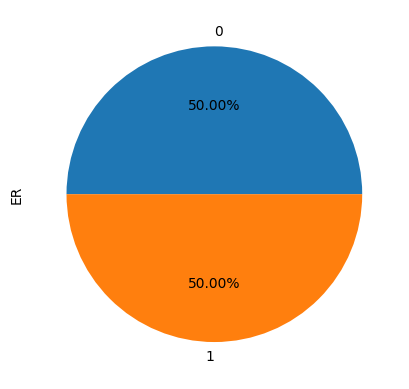

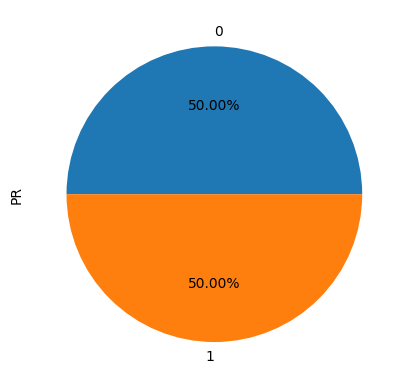

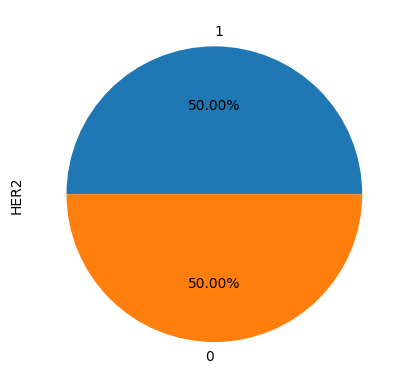

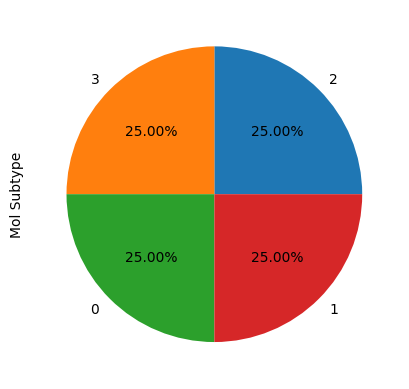

In [60]:
# Plot y_oversampled_er
y_oversampled_er.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
y_oversampled_pr.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
y_oversampled_her2.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
y_oversampled_mol.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

## Splitting the data into train_test_split ratios

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [68]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

SEED = 2454259

original_total_features = total_features.copy(deep=True)
total_features = scaled_features

In [69]:
def train_test_val_splits(df, train_ratio = 0.8, val_ratio = 0.2, random_state = 2454259):
   
    val_ratio_adj = val_ratio / (1-train_ratio)

    train_df, val_df = train_test_split(df, train_size = train_ratio, random_state= random_state)
    val_df, test_df = train_test_split(val_df, train_size = val_ratio_adj, random_state= random_state)

    # print("Length of training dataframe:", len(train_df))

    return train_df, val_df, test_df


In [83]:
# Merging x_oversampled_er and y_oversampled_er
oversampled_er = x_oversampled_er
# oversampled_er = pd.concat([x_oversampled_er, y_oversampled_er], axis = 1)
oversampled_er['ER'] = y_oversampled_er
train_df_er, val_df_er, test_df_er = train_test_val_splits(oversampled_er, TRAIN_RATIO, VAL_RATIO, random_state = SEED)

oversampled_pr = x_oversampled_pr
oversampled_pr['PR'] = y_oversampled_pr
train_df_pr, val_df_pr, test_df_pr = train_test_val_splits(oversampled_pr, TRAIN_RATIO, VAL_RATIO, random_state = SEED)

oversampled_her2 = x_oversampled_her2
oversampled_her2['HER2'] = y_oversampled_her2
train_df_her2, val_df_her2, test_df_her2 = train_test_val_splits(oversampled_her2, TRAIN_RATIO, VAL_RATIO, random_state = SEED)

oversampled_mol = x_oversampled_mol
oversampled_mol['Mol Subtype'] = y_oversampled_mol
train_df_mol, val_df_mol, test_df_mol = train_test_val_splits(oversampled_mol, TRAIN_RATIO, VAL_RATIO, random_state = SEED)

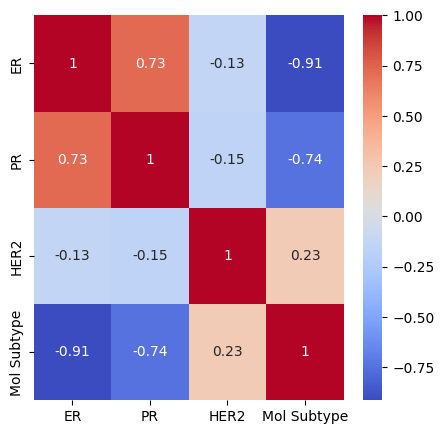

In [84]:
# correlation heatmap
ds = scaled_features[['ER', 'PR', 'HER2', 'Mol Subtype']]
corr = ds.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

##### This implies that for the classification of each subtype, the other subtype will have an impact on it, i.e., for ER+/- classification, PR, HER2, Mol Subtype will be considered as features

In [86]:
# splitting the dataset for training, testing, validating on ER subtype
train_x_er, train_y_er = train_df_er.drop(columns = ['ER']), train_df_er['ER']
val_x_er, val_y_er = val_df_er.drop(columns = ['ER']), val_df_er['ER']
test_x_er, test_y_er = test_df_er.drop(columns = ['ER']), test_df_er['ER']

# splitting the dataset for training, testing, validating on PR subtype
train_x_pr, train_y_pr = train_df_pr.drop(columns = ['PR']), train_df_pr['PR']
val_x_pr, val_y_pr = val_df_pr.drop(columns = ['PR']), val_df_pr['PR']
test_x_pr, test_y_pr = test_df_pr.drop(columns = ['PR']), test_df_pr['PR']

# splitting the dataset for training, testing, validating on HER2 subtype
train_x_her2, train_y_her2 = train_df_her2.drop(columns = ['HER2']), train_df_her2['HER2']
val_x_her2, val_y_her2 = val_df_her2.drop(columns = ['HER2']), val_df_her2['HER2']
test_x_her2, test_y_her2 = test_df_her2.drop(columns = ['HER2']), test_df_her2['HER2']

# splitting the dataset for training, testing, validating on molecular subtype
train_x_mol_subtype, train_y_mol_subtype = train_df_mol.drop(columns = ['Mol Subtype']), train_df_mol['Mol Subtype']
val_x_mol_subtype, val_y_mol_subtype = val_df_mol.drop(columns = ['Mol Subtype']), val_df_mol['Mol Subtype']
test_x_mol_subtype, test_y_mol_subtype = test_df_mol.drop(columns = ['Mol Subtype']), test_df_mol['Mol Subtype']

### Class distribution in the train, test and val splits

In [87]:
dist = pd.DataFrame({'ER+': [train_y_er.value_counts()[0], val_y_er.value_counts()[0], test_y_er.value_counts()[0]],
                     'ER-': [train_y_er.value_counts()[1], val_y_er.value_counts()[1], test_y_er.value_counts()[1]],
                     'PR+': [train_y_pr.value_counts()[0], val_y_pr.value_counts()[0], test_y_pr.value_counts()[0]],
                     'PR-': [train_y_pr.value_counts()[1], val_y_pr.value_counts()[1], test_y_pr.value_counts()[1]],
                     'HER2+': [train_y_her2.value_counts()[0], val_y_her2.value_counts()[0], test_y_her2.value_counts()[0]],
                     'HER2-': [train_y_her2.value_counts()[1], val_y_her2.value_counts()[1], test_y_her2.value_counts()[1]],
                     'Mol Subtype (0)': [train_y_mol_subtype.value_counts()[0], val_y_mol_subtype.value_counts()[0], test_y_mol_subtype.value_counts()[0]],
                     'Mol Subtype (1)': [train_y_mol_subtype.value_counts()[1], val_y_mol_subtype.value_counts()[1], test_y_mol_subtype.value_counts()[1]],
                     'Mol Subtype (2)': [train_y_mol_subtype.value_counts()[2], val_y_mol_subtype.value_counts()[2], test_y_mol_subtype.value_counts()[2]],
                     'Mol Subtype (3)': [train_y_mol_subtype.value_counts()[3], val_y_mol_subtype.value_counts()[3], test_y_mol_subtype.value_counts()[3]]},
                     index = ['Train', 'Val', 'Test'])
dist

,ER+,ER-,PR+,PR-,HER2+,HER2-,Mol Subtype (0),Mol Subtype (1),Mol Subtype (2),Mol Subtype (3)
Train,408,415,357,360,461,449,369,347,351,361
Val,143,131,118,121,152,152,111,122,124,119
Test,135,140,123,117,146,158,115,126,120,115


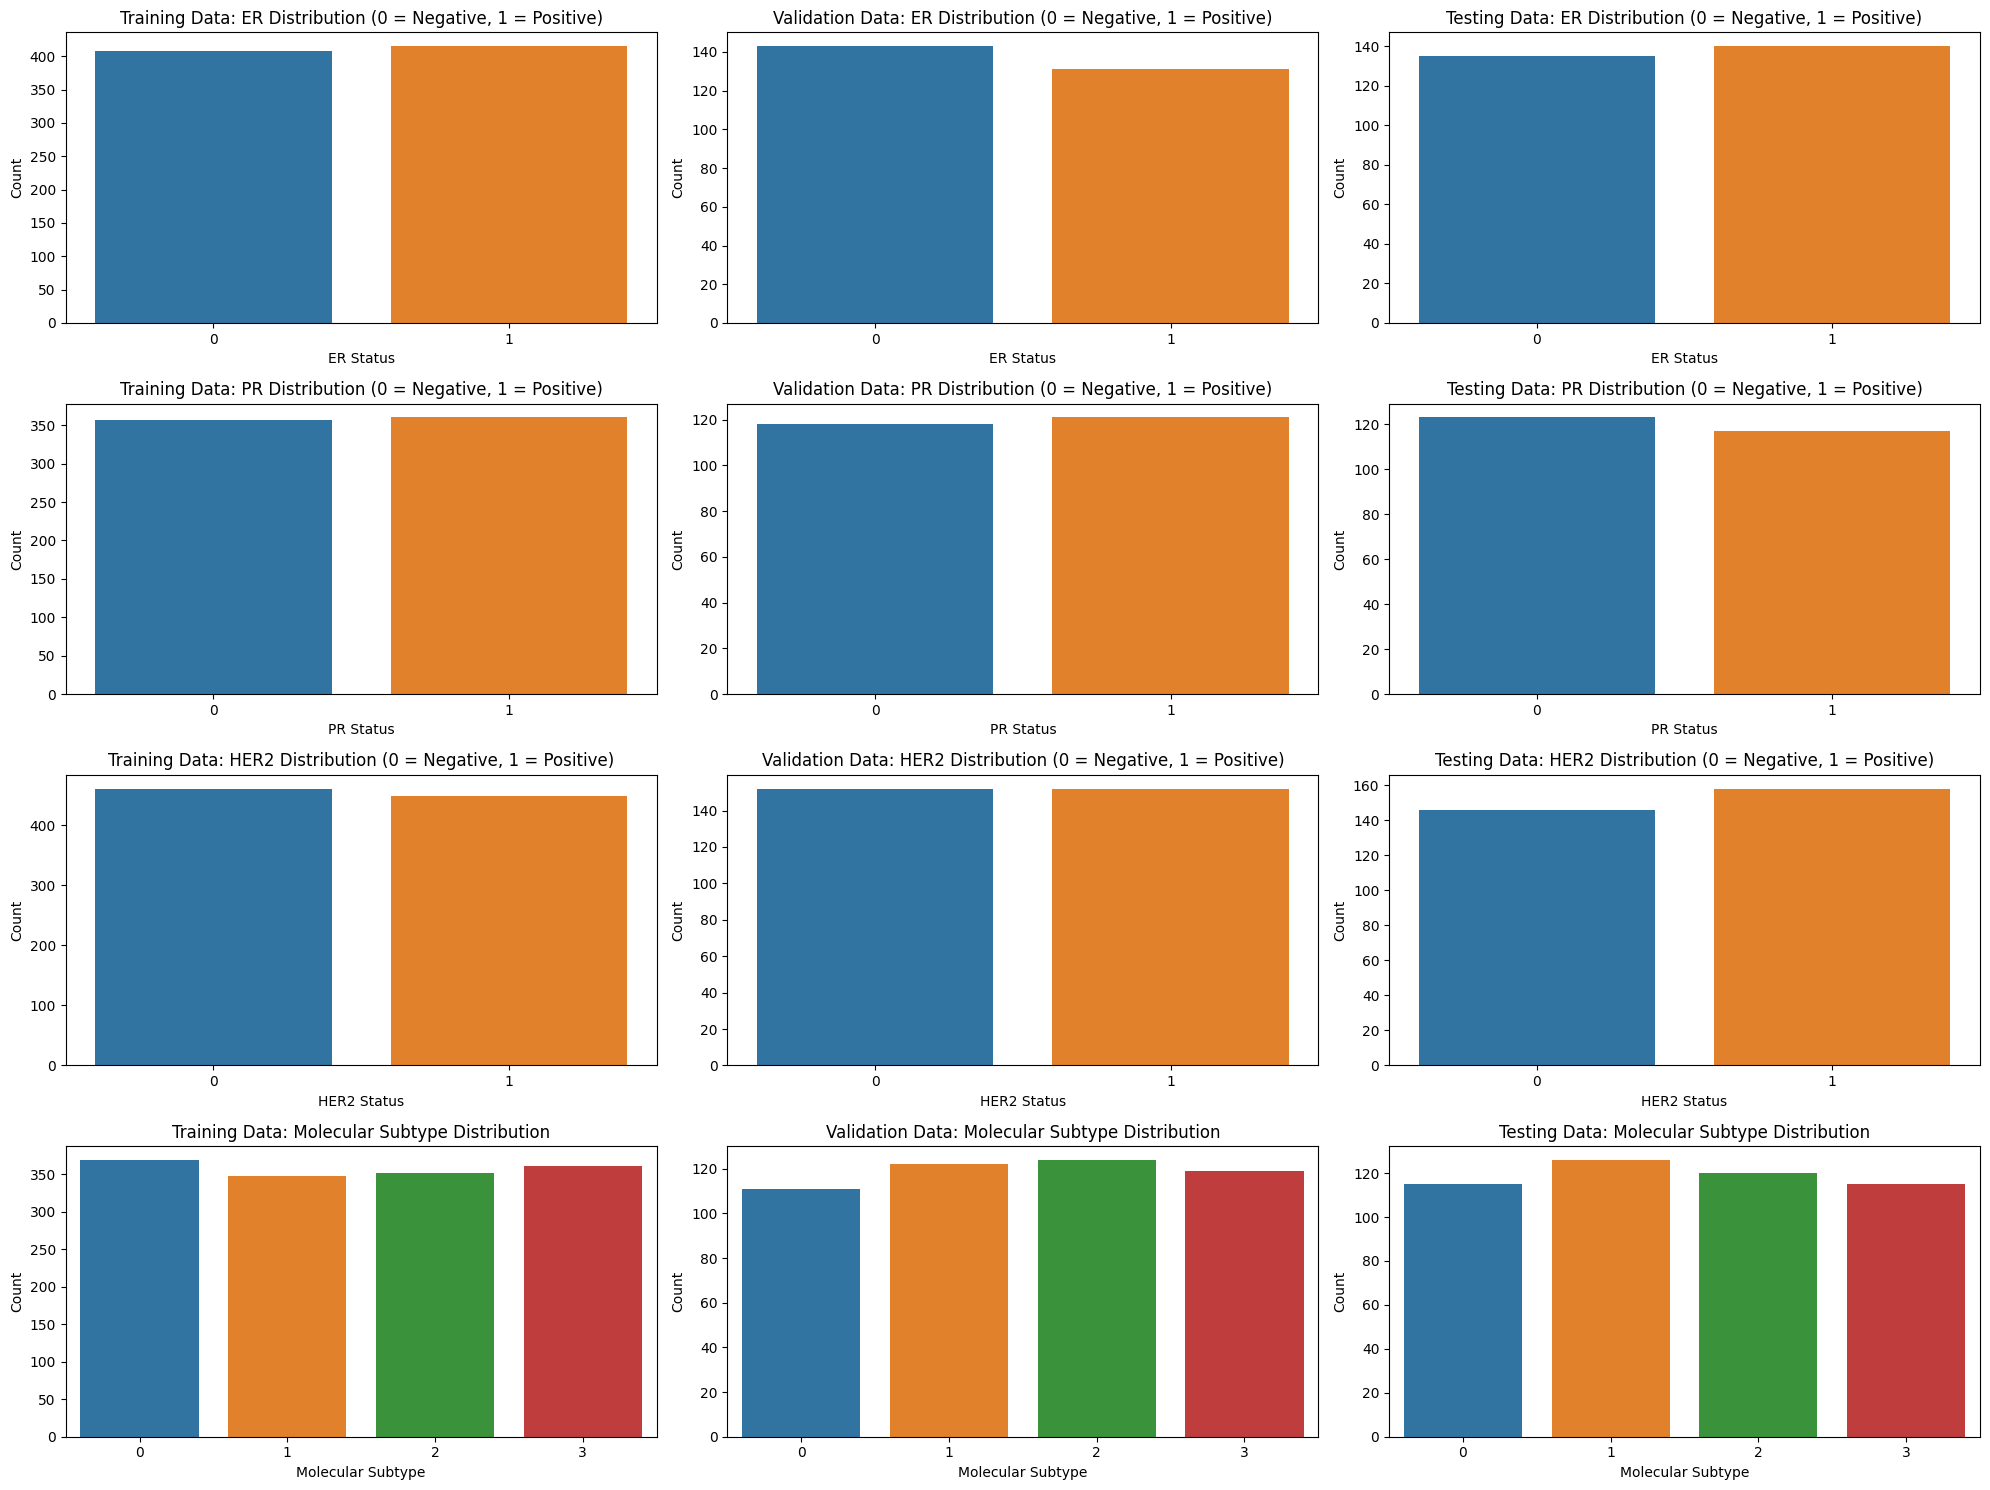

In [88]:
# creating multiple subplots of graph to visualise the above data 
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
plot_data = [[train_y_er, val_y_er, test_y_er], [train_y_pr, val_y_pr, test_y_pr], [train_y_her2, val_y_her2, test_y_her2], [train_y_mol_subtype, val_y_mol_subtype, test_y_mol_subtype]]
for i in range(4):
    for j in range(3):
        sns.countplot(x=plot_data[i][j], ax=axes[i][j])
        if i == 0:
            axes[i][j].set_xlabel('ER Status')
            if j == 0:
                axes[i][j].set_title('Training Data: ER Distribution (0 = Negative, 1 = Positive)')
            elif j == 1:
                axes[i][j].set_title('Validation Data: ER Distribution (0 = Negative, 1 = Positive)')
            else:
                axes[i][j].set_title('Testing Data: ER Distribution (0 = Negative, 1 = Positive)')
        
        elif i == 1:
            axes[i][j].set_xlabel('PR Status')
            if j == 0:
                axes[i][j].set_title('Training Data: PR Distribution (0 = Negative, 1 = Positive)')
            elif j == 1:
                axes[i][j].set_title('Validation Data: PR Distribution (0 = Negative, 1 = Positive)')
            else:
                axes[i][j].set_title('Testing Data: PR Distribution (0 = Negative, 1 = Positive)')
        
        elif i == 2:
            axes[i][j].set_xlabel('HER2 Status')
            if j == 0:
                axes[i][j].set_title('Training Data: HER2 Distribution (0 = Negative, 1 = Positive)')
            elif j == 1:
                axes[i][j].set_title('Validation Data: HER2 Distribution (0 = Negative, 1 = Positive)')
            else:
                axes[i][j].set_title('Testing Data: HER2 Distribution (0 = Negative, 1 = Positive)')
        
        else:
            axes[i][j].set_xlabel('Molecular Subtype')
            if j == 0:
                axes[i][j].set_title('Training Data: Molecular Subtype Distribution')
            elif j == 1:
                axes[i][j].set_title('Validation Data: Molecular Subtype Distribution')
            else:
                axes[i][j].set_title('Testing Data: Molecular Subtype Distribution')

        axes[i][j].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [89]:
def train_pipeline(model, trainx, trainy, valx, valy):
    model.fit(trainx, trainy)
    preds = model.predict(trainx)
    preds_val = model.predict(valx)

    acc_train, acc_val = accuracy_score(trainy, preds), accuracy_score(valy, preds_val)
    prec_train, prec_val = precision_score(trainy, preds, average = 'weighted'), precision_score(valy, preds_val, average = 'weighted')
    rec_train, rec_val = recall_score(trainy, preds, average = 'weighted'), recall_score(valy, preds_val, average = 'weighted')
    f1_train, f1_val = f1_score(trainy, preds, average = 'weighted'), f1_score(valy, preds_val, average = 'weighted')

    metrics = {'train_acc' : acc_train, 'val_acc' : acc_val,
               'train_prec': prec_train, 'val_prec': prec_val,
               'train_rec' : rec_train,  'val_rec' : rec_val,
               'train_f1' : f1_train, 'val_f1': f1_val}


    print("Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train, acc_val))
    print("Training Precision: {:.4f}, Validation Precision: {:.4f}".format(prec_train, prec_val))
    print("Training Recall: {:.4f}, Validation Recall: {:.4f}".format(rec_train, rec_val))
    print("Training F1-Score: {:.4f}, Validation F1-Score: {:.4f}".format(f1_train, f1_val))

    return model, metrics

In [90]:
def get_classification_report(model, trainx, trainy, valx, valy, testx, testy, class_names, title, subtype = None):
    model, metrics = train_pipeline(model, trainx, trainy, valx, valy)
    pred = model.predict(testx)


    acc_test = accuracy_score(testy, pred)
    prec_test = precision_score(testy, pred, average = 'weighted')
    rec_test = recall_score(testy, pred, average = 'weighted')
    f1_test = f1_score(testy, pred, average = 'weighted')
    
    metrics.update(
            {'test_acc' : acc_test,
            'test_prec': prec_test,
            'test_rec' : rec_test,
            'test_f1' : f1_test})

    if len(trainy.unique()) == 2:
        probs = model.predict_proba(testx)
        aucroc = roc_auc_score(testy, probs[:, 1], average = 'weighted')
        metrics.update({'test_aucroc' : aucroc})

    cls_report = classification_report(testy, pred, target_names = class_names, output_dict = True)
    sns.heatmap(pd.DataFrame(cls_report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    return metrics, model

## Classifications

In [91]:
classification_results = pd.DataFrame()

### Logistic Regression

Training Accuracy: 0.6744, Validation Accuracy: 0.5730
Training Precision: 0.6767, Validation Precision: 0.5731
Training Recall: 0.6744, Validation Recall: 0.5730
Training F1-Score: 0.6736, Validation F1-Score: 0.5731


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.6,0.599873,0.6,0.599809,0.643228


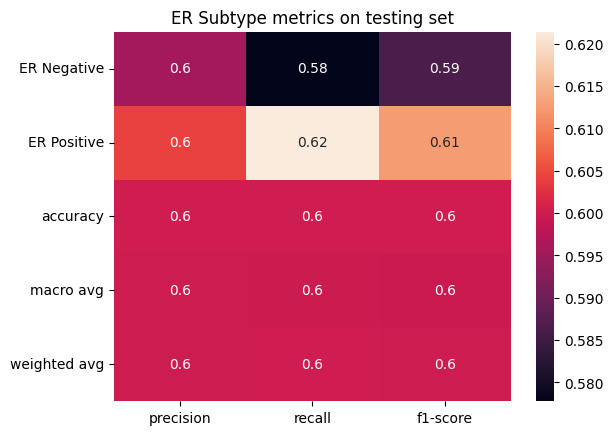

In [92]:
max_iter = 10000
logreg_er = LogisticRegression(max_iter = max_iter, random_state = SEED, class_weight = 'balanced')
report, logreg_er = get_classification_report(logreg_er, train_x_er, train_y_er, val_x_er, val_y_er, test_x_er, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.6736, Validation Accuracy: 0.5858
Training Precision: 0.6738, Validation Precision: 0.5872
Training Recall: 0.6736, Validation Recall: 0.5858
Training F1-Score: 0.6735, Validation F1-Score: 0.5827


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871


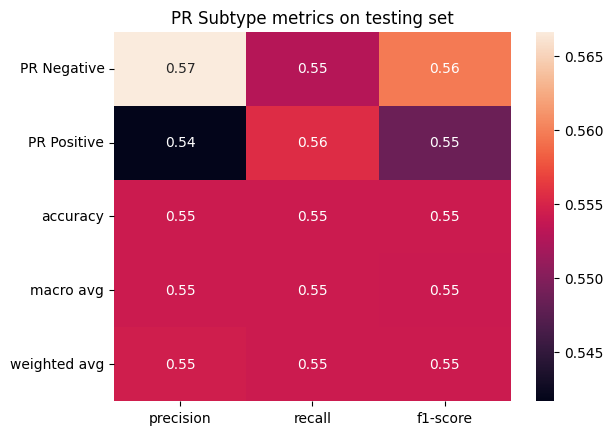

In [93]:
max_iter = 10000
logreg_pr = LogisticRegression(max_iter = max_iter, random_state = SEED, class_weight = 'balanced')
report, logreg_pr = get_classification_report(logreg_pr, train_x_pr, train_y_pr, val_x_pr, val_y_pr, test_x_pr, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

classification_results

Training Accuracy: 0.6956, Validation Accuracy: 0.6546
Training Precision: 0.6967, Validation Precision: 0.6546
Training Recall: 0.6956, Validation Recall: 0.6546
Training F1-Score: 0.6954, Validation F1-Score: 0.6546


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924


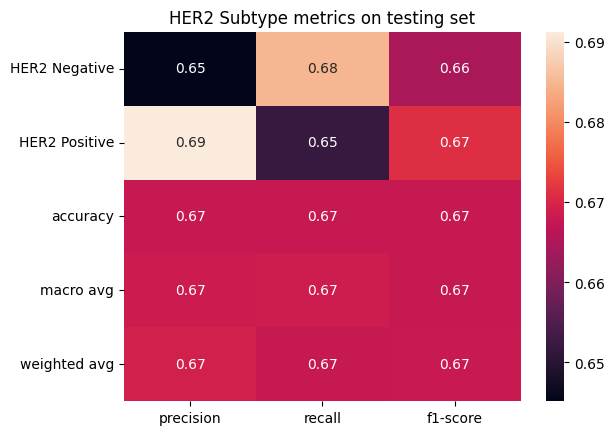

In [94]:
max_iter = 10000
logreg_her2 = LogisticRegression(max_iter = max_iter, random_state = SEED, class_weight = 'balanced')
report, logreg_her2 = get_classification_report(logreg_her2, train_x_her2, train_y_her2, val_x_her2, val_y_her2, test_x_her2, test_y_her2, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.5490, Validation Accuracy: 0.5504
Training Precision: 0.5486, Validation Precision: 0.5461
Training Recall: 0.5490, Validation Recall: 0.5504
Training F1-Score: 0.5458, Validation F1-Score: 0.5449


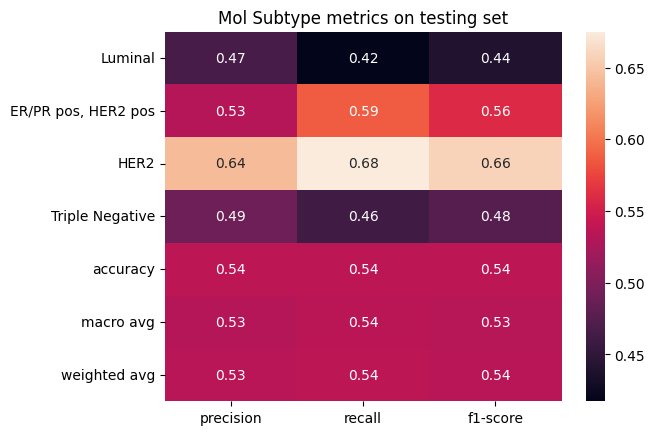

In [95]:
max_iter = 10000
logreg_mol_subtype = LogisticRegression(max_iter = max_iter, random_state = SEED, class_weight = 'balanced')
report, logreg_mol_subtype = get_classification_report(logreg_mol_subtype, train_x_mol_subtype, train_y_mol_subtype, val_x_mol_subtype, val_y_mol_subtype, test_x_mol_subtype, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

### Gaussian NB

Training Accuracy: 0.6112, Validation Accuracy: 0.5803
Training Precision: 0.6209, Validation Precision: 0.5990
Training Recall: 0.6112, Validation Recall: 0.5803
Training F1-Score: 0.6019, Validation F1-Score: 0.5700


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021


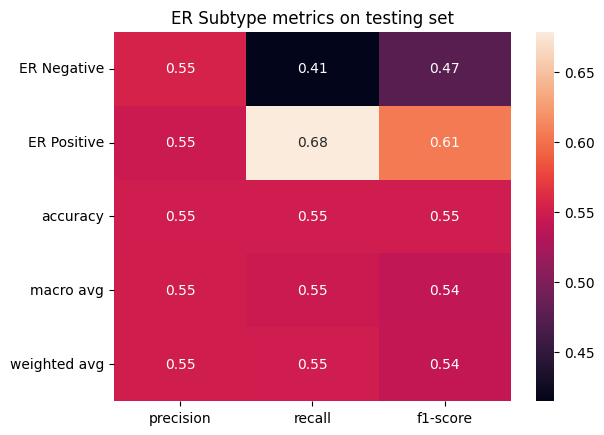

In [98]:
nb_er = GaussianNB()
report, nb_er = get_classification_report(nb_er, train_x_er, train_y_er, val_x_er, val_y_er, test_x_er, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set', subtype = 'ER')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.5565, Validation Accuracy: 0.5314
Training Precision: 0.5800, Validation Precision: 0.5428
Training Recall: 0.5565, Validation Recall: 0.5314
Training F1-Score: 0.5192, Validation F1-Score: 0.4851


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021
0,Naive Bayes,PR,0.556485,0.531381,0.579960,0.542786,0.556485,0.531381,0.519222,0.485145,0.520833,0.542016,0.520833,0.479403,0.574977


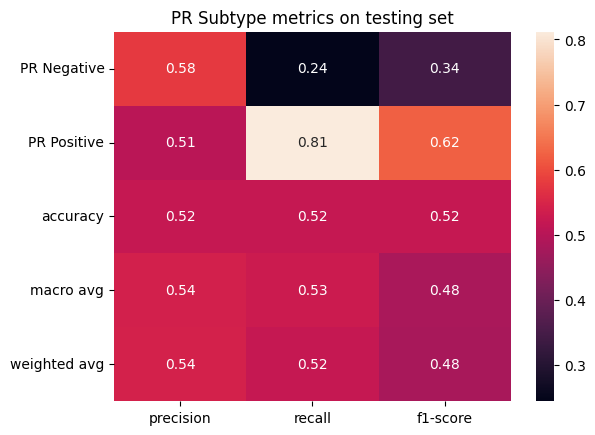

In [99]:
nb_pr = GaussianNB()
report, nb_pr = get_classification_report(nb_pr, train_x_pr, train_y_pr, val_x_pr, val_y_pr, test_x_pr, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.5967, Validation Accuracy: 0.5888
Training Precision: 0.5972, Validation Precision: 0.5890
Training Recall: 0.5967, Validation Recall: 0.5888
Training F1-Score: 0.5966, Validation F1-Score: 0.5886


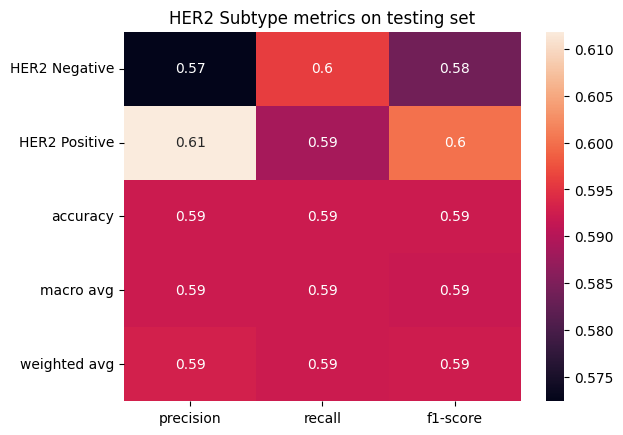

In [100]:
nb_her2 = GaussianNB()
report, nb_her2 = get_classification_report(nb_her2, train_x_her2, train_y_her2, val_x_her2, val_y_her2, test_x_her2, test_y_her2, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.3270, Validation Accuracy: 0.2899
Training Precision: 0.3905, Validation Precision: 0.3186
Training Recall: 0.3270, Validation Recall: 0.2899
Training F1-Score: 0.2680, Validation F1-Score: 0.2376


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021
0,Naive Bayes,PR,0.556485,0.531381,0.579960,0.542786,0.556485,0.531381,0.519222,0.485145,0.520833,0.542016,0.520833,0.479403,0.574977
0,Naive Bayes,HER2,0.596703,0.588816,0.597220,0.589005,0.596703,0.588816,0.596580,0.588598,0.592105,0.592884,0.592105,0.592264,0.623136
0,Naive Bayes,Mol Subtype,0.327031,0.289916,0.390510,0.318572,0.327031,0.289916,0.267973,0.237640,0.317227,0.391153,0.317227,0.268838,NaN


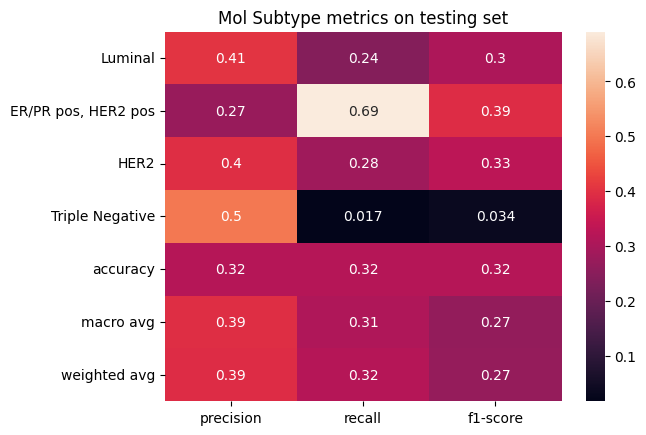

In [101]:
nb_mol_subtype = GaussianNB()
report, nb_mol_subtype = get_classification_report(nb_mol_subtype, train_x_mol_subtype, train_y_mol_subtype, val_x_mol_subtype, val_y_mol_subtype, test_x_mol_subtype, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

### Random Forest

Training Accuracy: 0.8858, Validation Accuracy: 0.6752
Training Precision: 0.8912, Validation Precision: 0.6750
Training Recall: 0.8858, Validation Recall: 0.6752
Training F1-Score: 0.8855, Validation F1-Score: 0.6750


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021
0,Naive Bayes,PR,0.556485,0.531381,0.579960,0.542786,0.556485,0.531381,0.519222,0.485145,0.520833,0.542016,0.520833,0.479403,0.574977
0,Naive Bayes,HER2,0.596703,0.588816,0.597220,0.589005,0.596703,0.588816,0.596580,0.588598,0.592105,0.592884,0.592105,0.592264,0.623136
0,Naive Bayes,Mol Subtype,0.327031,0.289916,0.390510,0.318572,0.327031,0.289916,0.267973,0.237640,0.317227,0.391153,0.317227,0.268838,NaN
0,Random Forest,ER,0.885784,0.675182,0.891210,0.674954,0.885784,0.675182,0.885451,0.674987,0.658182,0.664234,0.658182,0.656111,0.705185


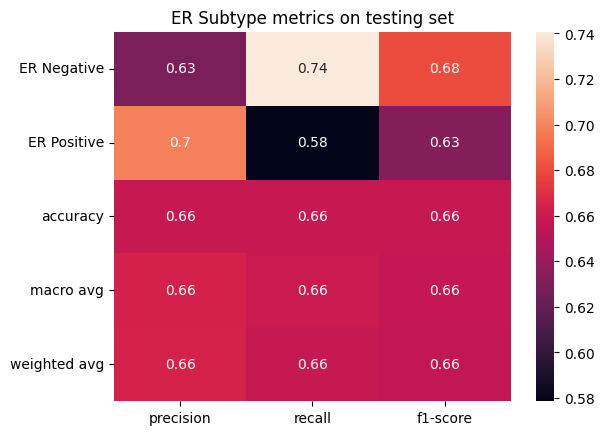

In [102]:
forest_er = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 6)
report, forest_er = get_classification_report(forest_er, train_x_er, train_y_er, val_x_er, val_y_er, test_x_er, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 1.0000, Validation Accuracy: 0.6318
Training Precision: 1.0000, Validation Precision: 0.6319
Training Recall: 1.0000, Validation Recall: 0.6318
Training F1-Score: 1.0000, Validation F1-Score: 0.6318


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021
0,Naive Bayes,PR,0.556485,0.531381,0.579960,0.542786,0.556485,0.531381,0.519222,0.485145,0.520833,0.542016,0.520833,0.479403,0.574977
0,Naive Bayes,HER2,0.596703,0.588816,0.597220,0.589005,0.596703,0.588816,0.596580,0.588598,0.592105,0.592884,0.592105,0.592264,0.623136
0,Naive Bayes,Mol Subtype,0.327031,0.289916,0.390510,0.318572,0.327031,0.289916,0.267973,0.237640,0.317227,0.391153,0.317227,0.268838,NaN
0,Random Forest,ER,0.885784,0.675182,0.891210,0.674954,0.885784,0.675182,0.885451,0.674987,0.658182,0.664234,0.658182,0.656111,0.705185
0,Random Forest,PR,1.000000,0.631799,1.000000,0.631913,1.000000,0.631799,1.000000,0.631812,0.625000,0.624930,0.625000,0.624268,0.682996


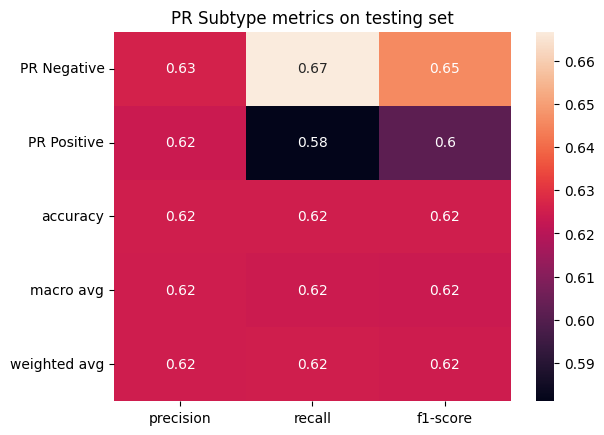

In [103]:
forest_pr = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 15)
report, forest_pr = get_classification_report(forest_pr, train_x_pr, train_y_pr, val_x_pr, val_y_pr, test_x_pr, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 1.0000, Validation Accuracy: 0.8059
Training Precision: 1.0000, Validation Precision: 0.8070
Training Recall: 1.0000, Validation Recall: 0.8059
Training F1-Score: 1.0000, Validation F1-Score: 0.8058


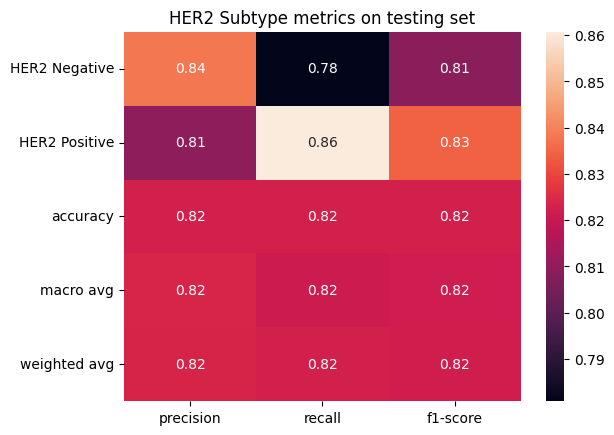

In [104]:
forest_her2 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 20)
report, forest_her2 = get_classification_report(forest_her2, train_x_her2, train_y_her2, val_x_her2, val_y_her2, test_x_her2, test_y_her2, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

Training Accuracy: 0.4174, Validation Accuracy: 0.3950
Training Precision: 0.4352, Validation Precision: 0.3602
Training Recall: 0.4174, Validation Recall: 0.3950
Training F1-Score: 0.3797, Validation F1-Score: 0.3530


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.674362,0.572993,0.676674,0.573133,0.674362,0.572993,0.673578,0.573055,0.600000,0.599873,0.600000,0.599809,0.643228
0,Logistic Regression,PR,0.673640,0.585774,0.673789,0.587156,0.673640,0.585774,0.673526,0.582717,0.554167,0.554479,0.554167,0.554236,0.592871
0,Logistic Regression,HER2,0.695604,0.654605,0.696658,0.654612,0.695604,0.654605,0.695423,0.654602,0.667763,0.669128,0.667763,0.667860,0.716924
0,Logistic Regression,Mol Subtype,0.549020,0.550420,0.548590,0.546091,0.549020,0.550420,0.545788,0.544888,0.537815,0.534137,0.537815,0.535084,NaN
0,Naive Bayes,ER,0.611179,0.580292,0.620872,0.598978,0.611179,0.580292,0.601917,0.569968,0.549091,0.550139,0.549091,0.541022,0.574021
0,Naive Bayes,PR,0.556485,0.531381,0.579960,0.542786,0.556485,0.531381,0.519222,0.485145,0.520833,0.542016,0.520833,0.479403,0.574977
0,Naive Bayes,HER2,0.596703,0.588816,0.597220,0.589005,0.596703,0.588816,0.596580,0.588598,0.592105,0.592884,0.592105,0.592264,0.623136
0,Naive Bayes,Mol Subtype,0.327031,0.289916,0.390510,0.318572,0.327031,0.289916,0.267973,0.237640,0.317227,0.391153,0.317227,0.268838,NaN
0,Random Forest,ER,0.885784,0.675182,0.891210,0.674954,0.885784,0.675182,0.885451,0.674987,0.658182,0.664234,0.658182,0.656111,0.705185
0,Random Forest,PR,1.000000,0.631799,1.000000,0.631913,1.000000,0.631799,1.000000,0.631812,0.625000,0.624930,0.625000,0.624268,0.682996


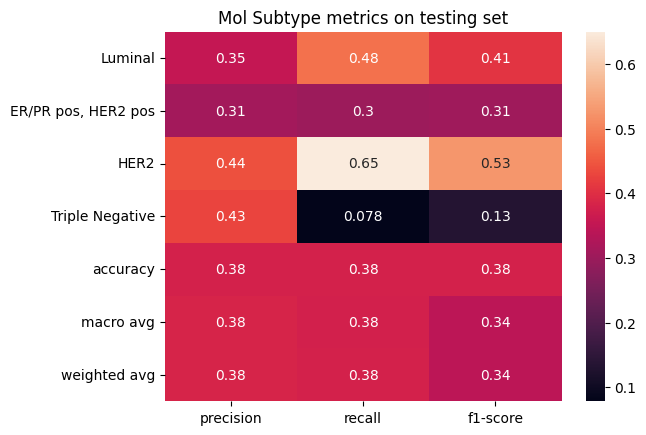

In [105]:
forest_mol_subtype = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 2)
report, forest_mol_subtype = get_classification_report(forest_mol_subtype, train_x_mol_subtype, train_y_mol_subtype, val_x_mol_subtype, val_y_mol_subtype, test_x_mol_subtype, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])
classification_results

In [ ]:
classification_results.to_csv('without_class_imbalance_results.csv', index = False)